In [1]:
from opensim import *
import numpy as np
import pickle
import pycapacity.human as capacity
from pycapacity.visual import plot_polytope_faces, plot_polytope_vertex
import matplotlib.pyplot as plt
from utils import getPolytopeAtJointConfig_i

In [4]:
modelPath = "./MOBL_ARMS_41/MOBL_ARMS_fixed_41_mkr_gh.osim"
model = Model(modelPath)
state = model.initSystem()

jointConfigs = {
    "elbow_flexion": np.array([94, 90, 68]) * SimTK_PI / 180,
    "pro_sup": np.array([-50, 0, 80]) * SimTK_PI / 180,
    "elv_angle": np.array([0, 20, 100]) * SimTK_PI / 180,
    "shoulder_elv": np.array([80, 10, 67]) * SimTK_PI / 180,
    "shoulder_rot": np.array([-1, -23, 40]) * SimTK_PI / 180
}

coordNames = list(jointConfigs.keys())

polytope_0 = getPolytopeAtJointConfig_i(
    i=0,
    jointConfigs=jointConfigs,
    model=model,
    state=state,
    body="hand",
    endEffector=[0, 0, 0],
    tol=1,
    muscleNames=None,
    coordNames=coordNames,
    name="polytope0",
    fullInfo=False
)


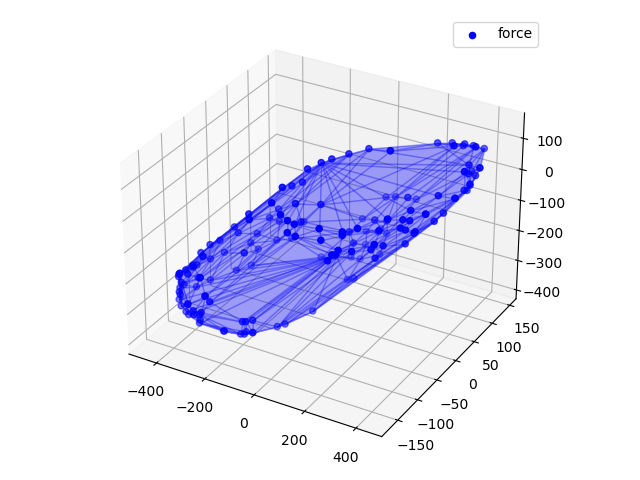

In [6]:
%matplotlib widget
fig = plt.figure()

vertices = polytope_0["vertices"]
face_indices = polytope_0["face_indices"]
faces = capacity.face_index_to_vertex(vertices, face_indices)

# draw faces and vertices
ax = plot_polytope_vertex(plt=plt, vertex=vertices,
                          label='force', color='blue')
plot_polytope_faces(ax=ax, faces=faces, face_color='blue',
                    edge_color='blue', alpha=0.2)

plt.tight_layout()
plt.legend()
plt.show()
